In [2]:
source('/home/meisl/Workplace/neuroblastoma/immune/NB.immune.atlas/lib.r')
source('/d0-bayes/home/meisl/bin/bin/source.R')


In [3]:
load('Bcell.RData')


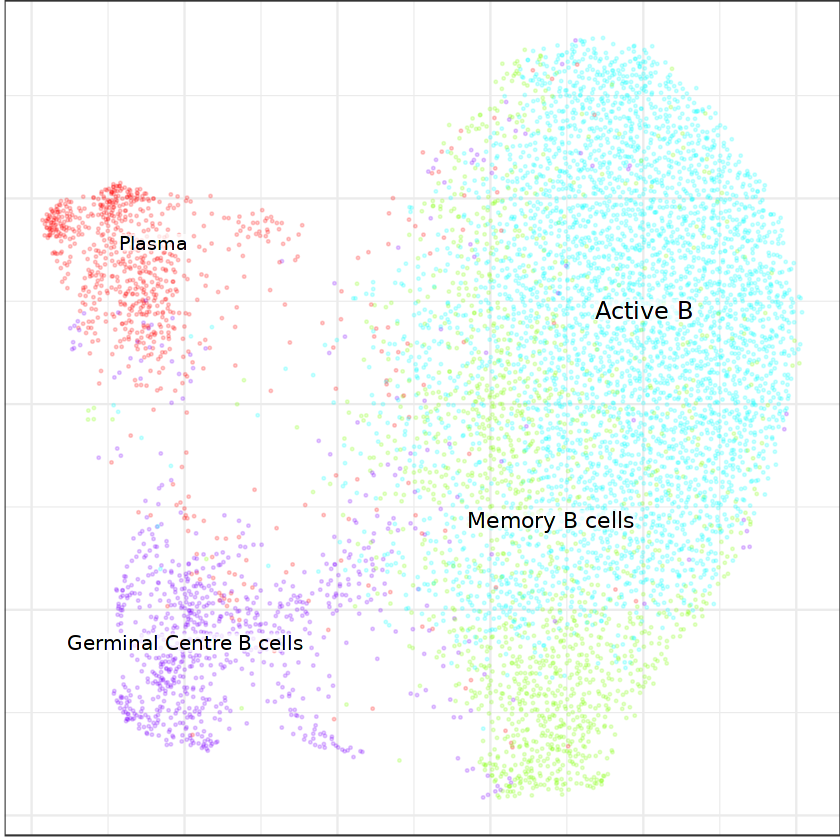

In [6]:
anoM  =as.factor(anoM)
anoM.pal <- setNames(sample(rainbow(length(levels(anoM)))),levels(anoM));
#anoM.pal['mDC-CLEC9A']='cyan'
anoM.palf <- function(n) return(anoM.pal)



a2=con$plotGraph(groups=anoM,plot.na=F,palette=anoM.palf,size=0.35,alpha=0.2,font.size = c(4, 5))
a2

[1]   19 7587


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




[1] "blue"
[1] "white"
[1] "red"


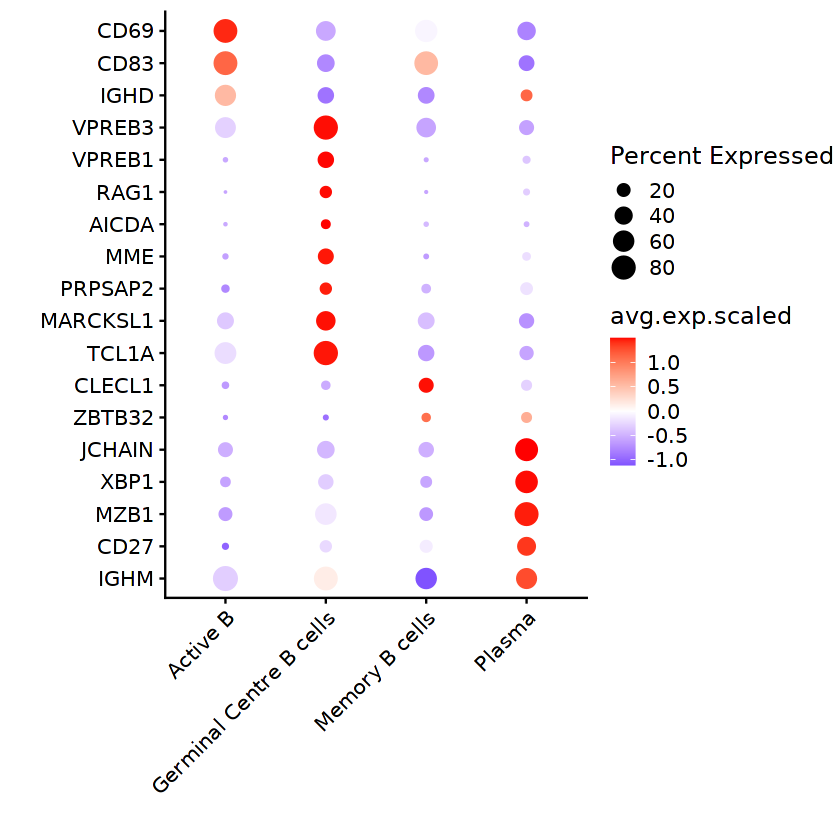

In [7]:

annot = anoM
features1=c(
  'CD69','CD83','IGHD',
  'VPREB3','VPREB1','RAG1','AICDA','MME','PRPSAP2','MARCKSL1','TCL1A',
  'CLECL1','ZBTB32',
  'JCHAIN','XBP1','MZB1','CD27','IGHM','IGHM')



genes = c(features1)   
exp <- do.call(rbind,lapply(sn(genes),function(gene) conos:::getGeneExpression(con,gene)))
exp[is.na(exp)]=0
dim(exp)

genes = intersect(genes,rownames(exp))

library(cowplot)
source('/d0-mendel/home/meisl/bin/FunctionLib/Lib/ploty.Dotplot.r')
cname=names(annot)
cname = intersect(cname,colnames(exp))
p=Dotfig(genes,exp[,cname],annot[cname],cols = c("blue","white", "red"))+xlab('')+ylab('')
p

#ggsave('Bcell.dotplot.plot.pdf',p,height=5,width=5.5)    


In [9]:
sample.groups2 = readRDS('/d0/home/meisl/Workplace/neuroblastoma/immune/data/sample.groups2.rds')


In [10]:
fraction.palette1 = c('grey','yellow','purple','red')
names(fraction.palette1) = c('Adrenal','Low risk','Intermediate risk','High risk')


Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Active B,000GGU,0.69005848
2,Germinal Centre B cells,000GGU,0.06432749
3,Memory B cells,000GGU,0.21637427
4,Plasma,000GGU,0.02923977
5,Active B,NB01,0.75555556
6,Germinal Centre B cells,NB01,0.11111111


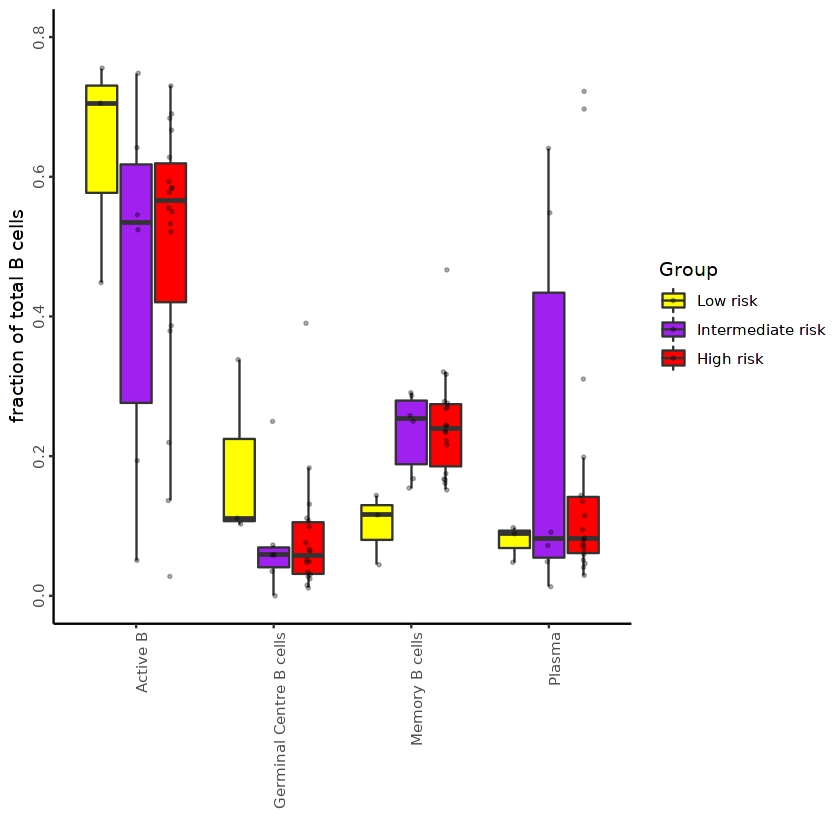

In [11]:
ssamp = con$getDatasetPerCell()
cname=names(anoM)
ano2=data.frame('Cell'=anoM[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)

tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)

names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups2[as.character(tmp4$sample)]


p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total B cells")+theme(legend.position="right")+
  scale_fill_manual(values=fraction.palette1[2:4])+ylim(0,0.8)
p

In [12]:

library(ggpubr)

df=tmp4
rsig=NULL
for (i in unique(df[,1])){
  tmp=df[df[,1]==i,]

  sig=compare_means(pc.of.sample ~ Group,  data = tmp) # 
  sig$cell=i
  rsig=rbind(rsig,sig)
  #sig[sig$p.signif!='ns',]
}

#write.table(rsig,'Bcell.fraction.1.pvalue.xls',sep='\t',col.names=T,row.names=F,quote=F)